<a href="https://colab.research.google.com/github/ranshull/DRUG_DRUG-INTERACTION/blob/an1/progress_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
# Step 1: Load Data


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"  # Update with your actual file path
df = pd.read_csv(file_path, index_col=0)  # Load data with drug IDs as index

In [ ]:
df.head()

,DB00006,DB00007,DB00014,DB00027,DB00035,DB00050,DB00067,DB00080,DB00091,DB00093,...,DB16351,DB16353,DB16390,DB16397,DB16400,DB16403,DB16404,DB16406,DB16407,DB16408
DB00006,0.000000,0.641350,0.608000,0.524017,0.830409,0.619658,0.813559,0.561702,0.461988,0.637427,...,0.497462,0.463203,0.513208,0.261062,0.455000,0.440529,0.454023,0.424354,0.288793,0.442149
DB00007,0.641350,0.000000,0.945148,0.758621,0.603448,0.766129,0.596639,0.710843,0.373333,0.461207,...,0.393701,0.538760,0.697417,0.354331,0.372549,0.368794,0.350649,0.545139,0.437751,0.511111
DB00014,0.608000,0.945148,0.000000,0.718367,0.571429,0.727969,0.565737,0.694981,0.352941,0.436735,...,0.379699,0.518519,0.683274,0.362595,0.364662,0.361775,0.331967,0.521595,0.437984,0.503571
DB00027,0.524017,0.758621,0.718367,0.000000,0.469027,0.672269,0.524664,0.754545,0.401042,0.525510,...,0.341880,0.637615,0.578947,0.413953,0.409091,0.300752,0.283019,0.511194,0.382609,0.466135
DB00035,0.830409,0.603448,0.571429,0.469027,0.000000,0.608889,0.888199,0.502146,0.465409,0.777027,...,0.510870,0.500000,0.476923,0.300971,0.481081,0.441860,0.484277,0.424710,0.281818,0.418803


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


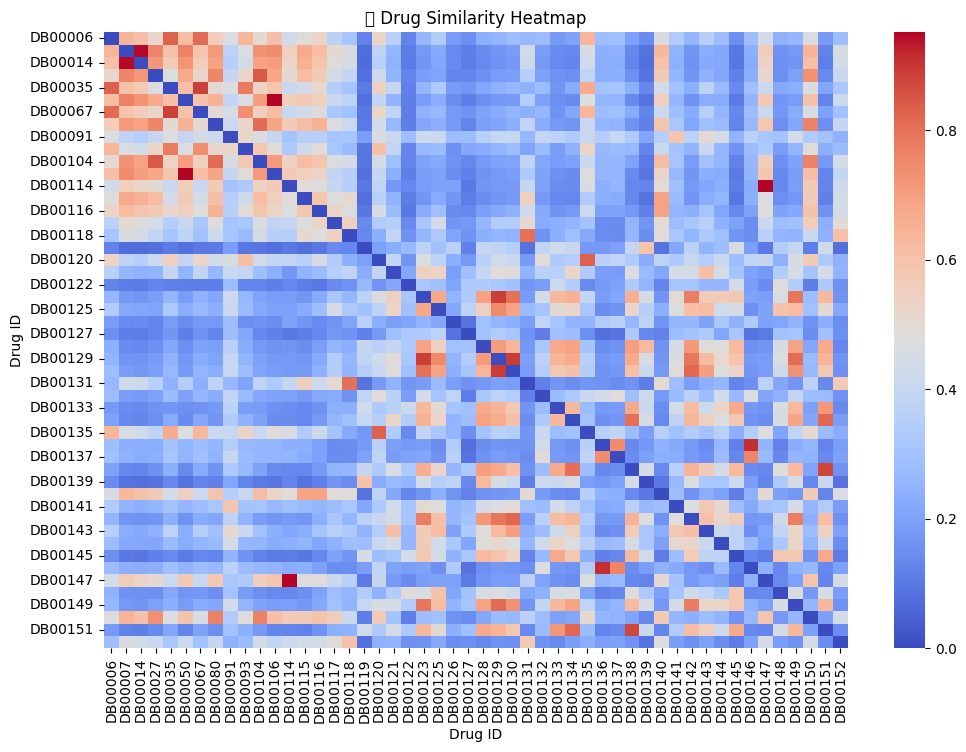

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset (optional for better visualization)
subset = df.iloc[:50, :50]  # First 50 drugs

plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap="coolwarm", annot=False)
plt.title("🔬 Drug Similarity Heatmap")
plt.xlabel("Drug ID")
plt.ylabel("Drug ID")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


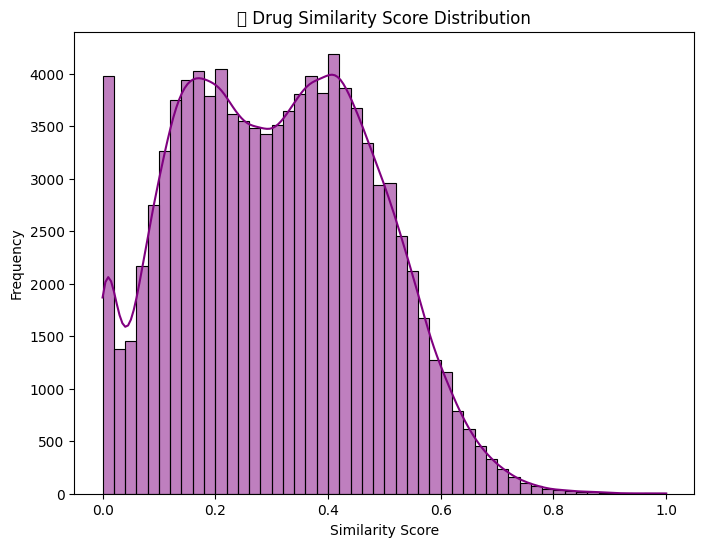

In [ ]:


# Sample only 100,000 similarity values instead of all (adjust as needed)
sample_data = np.random.choice(df.values.flatten(), size=100000, replace=False)

plt.figure(figsize=(8, 6))
sns.histplot(sample_data, bins=50, color="purple", kde=True)
plt.title("📊 Drug Similarity Score Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


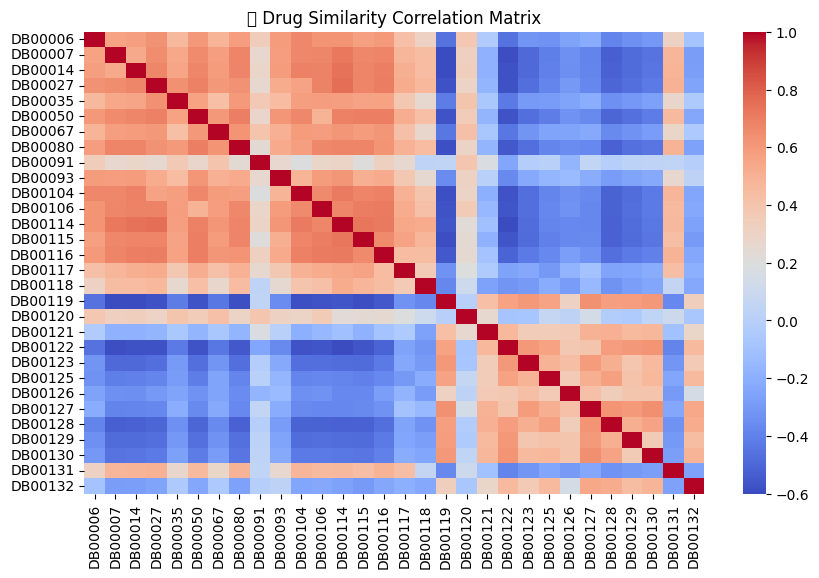

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:30, :30].corr(), cmap="coolwarm", annot=False)
plt.title("🔬 Drug Similarity Correlation Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


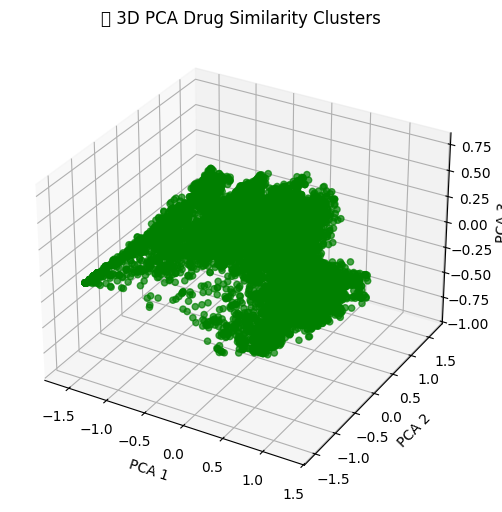

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df.iloc[:, :50])  # First 50 drugs

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c="green", alpha=0.7)
ax.set_title("🧬 3D PCA Drug Similarity Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


In [ ]:


# Convert drug IDs to strings
df.index = df.index.astype(str)
df.columns = df.columns.astype(str)

# Strip whitespace (if any)
df.index = df.index.str.strip()
df.columns = df.columns.str.strip()

# Check if DB00007 exists
print("DB00007" in df.index)  # Should return True
print("DB00007" in df.columns)  # Should return True


True
True


In [ ]:
similarities = df.loc["DB00007"]
print(similarities)


DB00006    0.641350
DB00007    0.000000
DB00014    0.945148
DB00027    0.758621
DB00035    0.603448
             ...   
DB16403    0.368794
DB16404    0.350649
DB16406    0.545139
DB16407    0.437751
DB16408    0.511111
Name: DB00007, Length: 11168, dtype: float64


In [ ]:
top_similar = df.loc["DB00007"].sort_values(ascending=False)[1:4]  # Exclude itself (0.0 similarity)
print(top_similar)


DB11510    0.973913
DB06825    0.973913
DB00666    0.957265
Name: DB00007, dtype: float64


In [ ]:
import joblib

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



# Ensure all IDs are strings
df.index = df.index.astype(str)
df.columns = df.columns.astype(str)
df.index = df.index.str.strip()
df.columns = df.columns.str.strip()

# Select a drug (example: "DB00007") and its similarities
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert dataframe to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()


In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Save Model as a .pkl File
joblib.dump(model, "drug_similarity_model.pkl")
print("✅ Model saved as 'drug_similarity_model.pkl'")

# Load & Test Model
loaded_model = joblib.load("drug_similarity_model.pkl")
print("✅ Model loaded successfully. Ready for predictions!")

✅ Model saved as 'drug_similarity_model.pkl'
✅ Model loaded successfully. Ready for predictions!


100%|===================| 11150/11167 [03:42<00:00]       

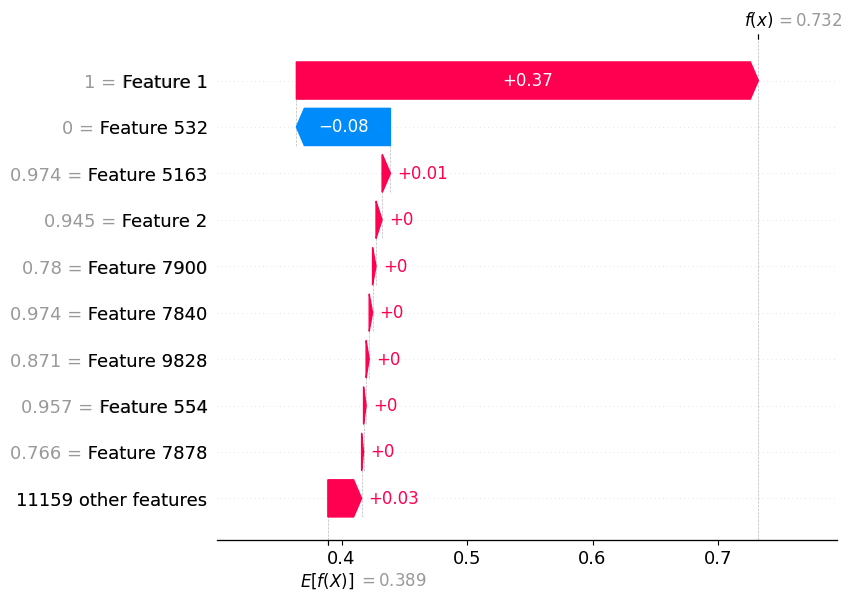

In [ ]:
# Train a model to "predict" similarity (treating it as a regression problem)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot Explanation for the Most Similar Drug
most_similar_index = np.argmax(y)  # Get most similar drug's index
shap.waterfall_plot(shap_values[most_similar_index])  # Show feature contributions


In [ ]:
pip install joblib

In [ ]:
most_similar_index = np.argmax(y)
most_similar_drug = df.index[most_similar_index]

# Get SHAP explanation for why this drug is similar
shap_importance = shap_values[most_similar_index].values

# Rank top influencing drugs
top_features = np.argsort(-np.abs(shap_importance))[:5]  # Top 5 contributing drugs
top_drugs = df.index[top_features]
top_contributions = shap_importance[top_features]

# Generate text explanation
explanation = f"🔹 **Explanation for why {drug_id} is most similar to {most_similar_drug}:**\n\n"
explanation += f"📌 The similarity score between **{drug_id} and {most_similar_drug}** is **{y[most_similar_index]:.3f}**.\n"
explanation += "📊 The key contributing drugs that influenced this similarity are:\n"

for i in range(len(top_drugs)):
    sign = "increased" if top_contributions[i] > 0 else "decreased"
    explanation += f"   - **{top_drugs[i]}** ({sign} similarity by {abs(top_contributions[i]):.3f})\n"

explanation += "\n🧐 This means that the presence of these similar drugs in the dataset strongly influenced the prediction, making **" \
               f"{most_similar_drug}** the most similar drug to **{drug_id}**."

# Print the explanation
print(explanation)

🔹 **Explanation for why DB00007 is most similar to DB00643:**

📌 The similarity score between **DB00007 and DB00643** is **1.000**.
📊 The key contributing drugs that influenced this similarity are:
   - **DB00007** (increased similarity by 0.368)
   - **DB00644** (decreased similarity by 0.075)
   - **DB06825** (increased similarity by 0.007)
   - **DB00014** (increased similarity by 0.005)
   - **DB11613** (increased similarity by 0.003)

🧐 This means that the presence of these similar drugs in the dataset strongly influenced the prediction, making **DB00643** the most similar drug to **DB00007**.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

# Generate predictions using the trained model
y_pred = model.predict(X)

# Compute metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
spearman_corr, _ = spearmanr(y, y_pred)

# Display results
print(f"🔹 **Model Evaluation Metrics:**")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 R² Score: {r2:.4f}")
print(f"📌 Spearman Rank Correlation: {spearman_corr:.4f}")


🔹 **Model Evaluation Metrics:**
📌 Mean Squared Error (MSE): 0.0000
📌 Mean Absolute Error (MAE): 0.0001
📌 R² Score: 0.9998
📌 Spearman Rank Correlation: 1.0000


In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Step 1: Load the Drug Similarity Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"
df = pd.read_csv(file_path, index_col=0)

# Ensure all IDs are strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 🔹 Step 2: Select a Drug (Example: "DB00007") & Prepare Data
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert DataFrame to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()

# 🔹 Step 3: Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 4: Train XGBoost Model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# 🔹 Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 6: Explainability with SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 🔹 Step 7: Plot SHAP Summary
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test)

# 🔹 Step 8: Save the XGBoost Model
model_path = "/content/drive/MyDrive/Colab Notebooks/drug_similarity_xgb.pkl"
import joblib
joblib.dump(model, model_path)
print(f"✅ Model saved as {model_path}")


✅ Model Performance:
📌 Mean Squared Error (MSE): 0.0000
📌 R² Score: 0.9997


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Step 1: Load the Drug Similarity Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"
df = pd.read_csv(file_path, index_col=0)

# Ensure all IDs are strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 🔹 Step 2: Select a Drug (Example: "DB00007") & Prepare Data
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert DataFrame to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()

# 🔹 Step 3: Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 4: Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')  # Using Euclidean distance
knn_model.fit(X_train, y_train)

# 🔹 Step 5: Model Evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 6: Save the KNN Model
model_path = "/content/drive/MyDrive/Colab Notebooks/drug_similarity_knn.pkl"
joblib.dump(knn_model, model_path)
print(f"✅ Model saved as {model_path}")


✅ Model Performance:
📌 Mean Squared Error (MSE): 0.0003
📌 R² Score: 0.9915
✅ Model saved as /content/drive/MyDrive/Colab Notebooks/drug_similarity_knn.pkl


--------------------------------------------------------------------------------

In [ ]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=4080f7697c7d15ff5ec654e64541890a882788770d450b3ddf0785ea5f55f65b
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [ ]:
pip install shap

In [ ]:
# Install pubchempy (if not installed)
!pip install pubchempy

import pubchempy as pcp

def get_drug_info(identifier):
    """
    Fetch drug information using a name, DrugBank ID, or PubChem CID.
    """
    try:
        if identifier.isdigit():  # If input is numeric, treat as CID
            compound = pcp.Compound.from_cid(int(identifier))
        else:  # Otherwise, search by name or DrugBank ID
            results = pcp.get_compounds(identifier, 'name')
            if not results:
                print(f"No results found for: {identifier}")
                return None
            compound = results[0]

        # Extract external identifiers (including DrugBank ID if available)
        drugbank_id = None
        if compound.synonyms:
            for synonym in compound.synonyms:
                if synonym.startswith("DB"):  # DrugBank IDs typically start with "DB"
                    drugbank_id = synonym
                    break  # Stop once found

        # Extract relevant details
        drug_info = {
            "Name": compound.iupac_name,
            "Molecular Formula": compound.molecular_formula,
            "Molecular Weight": compound.molecular_weight,
            "Canonical SMILES": compound.canonical_smiles,
            "InChIKey": compound.inchikey,
            "PubChem CID": compound.cid,
            "DrugBank ID": drugbank_id if drugbank_id else "Not Found"
        }

        return drug_info

    except Exception as e:
        print(f"Error fetching drug info: {e}")
        return None

# Run the function in Colab
identifier = input("Enter Drug Name, DrugBank ID, or PubChem CID: ")
drug_info = get_drug_info(identifier)

if drug_info:
    print("\n**Drug Information:**")
    for key, value in drug_info.items():
        print(f"{key}: {value}")
else:
    print("No data found.")


Enter Drug Name, DrugBank ID, or PubChem CID: DB00006

**Drug Information:**
Name: (2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-1-[(2S,3S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[2-[[(2S)-4-amino-2-[[2-[[2-[[2-[[2-[[(2S)-1-[(2S)-2-[[(2S)-1-[(2R)-2-amino-3-phenylpropanoyl]pyrrolidine-2-carbonyl]amino]-5-carbamimidamidopentanoyl]pyrrolidine-2-carbonyl]amino]acetyl]amino]acetyl]amino]acetyl]amino]acetyl]amino]-4-oxobutanoyl]amino]acetyl]amino]-3-carboxypropanoyl]amino]-3-phenylpropanoyl]amino]-4-carboxybutanoyl]amino]-4-carboxybutanoyl]amino]-3-methylpentanoyl]pyrrolidine-2-carbonyl]amino]-4-carboxybutanoyl]amino]-4-carboxybutanoyl]amino]-3-(4-hydroxyphenyl)propanoyl]amino]-4-methylpentanoic acid
Molecular Formula: C98H138N24O33
Molecular Weight: 2180.3
Canonical SMILES: CCC(C)C(C(=O)N1CCCC1C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CC2=CC=C(C=C2)O)C(=O)NC(CC(C)C)C(=O)O)NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=O)C(CC3=CC=CC=C3)NC(=O)C(CC(=O)O)NC(=O)CNC(=O)C(CC(=O)N)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class SubsetMLDrugRecommender:
    def __init__(self, similarity_matrix=None, similarity_matrix_path=None, subset_size=1000):
        """
        Initialize the ML-based drug recommendation system with a similarity matrix.
        Can work with a subset of drugs to handle large datasets.

        Parameters:
        -----------
        similarity_matrix : pandas.DataFrame, optional
            A dataframe containing the Tanimoto similarity matrix
        similarity_matrix_path : str, optional
            Path to the similarity matrix CSV file
        subset_size : int, default=1000
            Maximum number of drugs to include in the subset
        """
        # Load the similarity matrix if provided
        if similarity_matrix is not None:
            self.full_similarity_df = similarity_matrix
        elif similarity_matrix_path is not None:
            self.full_similarity_df = pd.read_csv(similarity_matrix_path, index_col=0)
        else:
            raise ValueError("Either similarity_matrix or similarity_matrix_path must be provided")

        # Store the full list of drug IDs
        self.all_drug_ids = list(self.full_similarity_df.index)
        self.subset_size = min(subset_size, len(self.all_drug_ids))

        # Initialize as empty
        self.active_drug_ids = []
        self.similarity_df = None
        self.models = {}

        # Initialize the embedding models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None

    def create_random_subset(self, seed=42):
        """
        Create a random subset of drugs to work with.

        Parameters:
        -----------
        seed : int, default=42
            Random seed for reproducibility

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        np.random.seed(seed)
        self.active_drug_ids = np.random.choice(
            self.all_drug_ids,
            size=self.subset_size,
            replace=False
        ).tolist()

        return self.set_active_drugs(self.active_drug_ids)

    def set_active_drugs(self, drug_ids):
        """
        Set the active subset of drugs to work with.

        Parameters:
        -----------
        drug_ids : list
            List of drug IDs to include in the active set

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate that all drugs exist in the full matrix
        missing_drugs = [drug for drug in drug_ids if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following drugs were not found in the dataset: {missing_drugs}")

        # Set the active drug IDs
        self.active_drug_ids = drug_ids

        # Create the subset similarity matrix
        self.similarity_df = self.full_similarity_df.loc[self.active_drug_ids, self.active_drug_ids]

        # Reset the models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None
        self.models = {}

        print(f"Working with a subset of {len(self.active_drug_ids)} drugs")
        return self.similarity_df

    def create_subset_from_seeds(self, seed_drugs, neighbors_per_seed=50):
        """
        Create a subset centered around specific seed drugs.

        Parameters:
        -----------
        seed_drugs : list
            List of drug IDs to use as seeds
        neighbors_per_seed : int, default=50
            Number of similar drugs to include for each seed

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate seed drugs
        missing_drugs = [drug for drug in seed_drugs if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following seed drugs were not found: {missing_drugs}")

        # Start with the seed drugs
        subset = set(seed_drugs)

        # For each seed drug, find its most similar drugs
        for drug in seed_drugs:
            # Get similarity scores for this drug
            similarities = self.full_similarity_df[drug].sort_values(ascending=False)

            # Add the top neighbors (excluding the drug itself and already added drugs)
            neighbors = [
                neighbor for neighbor in similarities.index
                if neighbor != drug and neighbor not in subset
            ][:neighbors_per_seed]

            subset.update(neighbors)

        # Convert to list and set as active
        self.active_drug_ids = list(subset)

        # Limit to subset_size if needed
        if len(self.active_drug_ids) > self.subset_size:
            self.active_drug_ids = self.active_drug_ids[:self.subset_size]

        return self.set_active_drugs(self.active_drug_ids)

    def create_embeddings(self, n_components=None):
        """
        Create lower-dimensional embeddings of the drugs based on similarity matrix.

        Parameters:
        -----------
        n_components : int, optional
            Number of components for PCA. If None, uses min(n_samples, n_features) // 2

        Returns:
        --------
        pandas.DataFrame
            DataFrame with the embeddings
        """
        if self.similarity_df is None:
            raise ValueError("No active drug subset. Call create_random_subset or set_active_drugs first.")

        # Set a default number of components based on dataset size
        if n_components is None:
            n_components = min(len(self.active_drug_ids) // 2, 50)

        # Apply PCA to reduce dimensions
        self.pca_model = PCA(n_components=n_components)
        self.pca_embeddings = self.pca_model.fit_transform(self.similarity_df)

        # Create a dataframe with the embeddings
        self.embedding_df = pd.DataFrame(
            self.pca_embeddings,
            index=self.active_drug_ids,
            columns=[f'PC{i+1}' for i in range(n_components)]
        )

        print(f"Created {n_components}-dimensional embeddings using PCA")
        print(f"Explained variance ratio: {sum(self.pca_model.explained_variance_ratio_):.4f}")

        return self.embedding_df

    def create_tsne_visualization(self, perplexity=30, n_iter=1000):
        """
        Create a t-SNE visualization of the drug embeddings.

        Parameters:
        -----------
        perplexity : int, default=30
            Perplexity parameter for t-SNE
        n_iter : int, default=1000
            Number of iterations for t-SNE

        Returns:
        --------
        pandas.DataFrame
            DataFrame with t-SNE coordinates
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Apply t-SNE to visualize the embeddings in 2D
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
        self.tsne_embeddings = tsne.fit_transform(self.pca_embeddings)

        # Create a dataframe with the t-SNE coordinates
        self.tsne_df = pd.DataFrame(
            self.tsne_embeddings,
            index=self.active_drug_ids,
            columns=['x', 'y']
        )

        return self.tsne_df

    def cluster_drugs(self, n_clusters=None):
        """
        Cluster drugs based on their embeddings.

        Parameters:
        -----------
        n_clusters : int, optional
            Number of clusters. If None, uses sqrt(n) rule of thumb.

        Returns:
        --------
        pandas.Series
            Series mapping drug IDs to cluster labels
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Set a default number of clusters based on dataset size
        if n_clusters is None:
            n_clusters = max(2, int(np.sqrt(len(self.active_drug_ids))))

        # Apply KMeans clustering
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
        self.cluster_labels = self.kmeans_model.fit_predict(self.pca_embeddings)

        # Create a series mapping drug IDs to cluster labels
        self.clusters = pd.Series(self.cluster_labels, index=self.active_drug_ids)

        return self.clusters

    def train_similarity_predictor(self, test_size=0.2, random_state=42, drugs_to_train=None):
        """
        Train a machine learning model to predict similarity between drugs.

        Parameters:
        -----------
        test_size : float, default=0.2
            Proportion of the data to use for testing
        random_state : int, default=42
            Random seed for reproducibility
        drugs_to_train : list, optional
            Specific drugs to train models for. If None, trains for all active drugs.

        Returns:
        --------
        dict
            Dictionary containing training metrics
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # If no specific drugs are provided, use all active drugs
        if drugs_to_train is None:
            drugs_to_train = self.active_drug_ids
        else:
            # Validate that all drugs are in the active set
            missing_drugs = [drug for drug in drugs_to_train if drug not in self.active_drug_ids]
            if missing_drugs:
                raise ValueError(f"The following drugs are not in the active set: {missing_drugs}")

        print(f"Training similarity prediction models for {len(drugs_to_train)} drugs...")

        # For each drug, we'll train a model to predict its similarity to other drugs
        for i, drug_id in enumerate(drugs_to_train):
            if i % 10 == 0 and i > 0:
                print(f"Trained {i} models...")

            # Get the similarity scores for this drug
            y = self.similarity_df[drug_id].values

            # Use the embeddings as features
            X = self.pca_embeddings

            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )

            # Train a RandomForest model
            model = RandomForestRegressor(n_estimators=100, random_state=random_state)
            model.fit(X_train, y_train)

            # Evaluate the model
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Store the model
            self.models[drug_id] = {
                'model': model,
                'mse': mse
            }

        # Calculate average MSE
        avg_mse = np.mean([self.models[drug_id]['mse'] for drug_id in drugs_to_train])
        print(f"Average MSE across all trained drug models: {avg_mse:.6f}")

        return {'avg_mse': avg_mse}

    def build_nearest_neighbors(self, n_neighbors=20, metric='euclidean'):
        """
        Build a nearest neighbors model for fast similarity search.

        Parameters:
        -----------
        n_neighbors : int, default=20
            Number of neighbors to find
        metric : str, default='euclidean'
            Distance metric to use
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Build the nearest neighbors model
        self.nn_model = NearestNeighbors(n_neighbors=min(n_neighbors, len(self.active_drug_ids)), metric=metric)
        self.nn_model.fit(self.pca_embeddings)

        print(f"Built nearest neighbors model with {min(n_neighbors, len(self.active_drug_ids))} neighbors and {metric} distance")

    def recommend_similar_drugs(self, drug_id, top_n=10, method='embedding'):
        """
        Recommend similar drugs using machine learning.

        Parameters:
        -----------
        drug_id : str
            The ID of the input drug
        top_n : int, default=10
            Number of similar drugs to return
        method : str, default='embedding'
            Method to use for recommendations:
            - 'embedding': Use nearest neighbors in the embedding space
            - 'ml': Use trained ML models to predict similarity
            - 'hybrid': Combine embedding distance and ML prediction
            - 'direct': Use the raw similarity matrix (fallback)

        Returns:
        --------
        list of tuples
            Each tuple contains (drug_id, similarity_score)
        """
        # Check if the drug is in the active set
        if drug_id not in self.active_drug_ids:
            # If not, check if it's in the full set and suggest adding it
            if drug_id in self.all_drug_ids:
                print(f"Warning: Drug {drug_id} is not in the active set. Consider adding it with set_active_drugs().")
                # Fallback to using the direct similarity from the full matrix
                similarities = self.full_similarity_df.loc[drug_id]
                similarities = similarities.loc[self.active_drug_ids]  # Only consider active drugs
                sorted_similarities = similarities.sort_values(ascending=False)
                recommendations = [(drug, score) for drug, score in sorted_similarities.items() if drug != drug_id]
                return recommendations[:top_n]
            else:
                raise ValueError(f"Drug ID {drug_id} not found in the dataset")

        if method == 'embedding':
            if self.nn_model is None:
                self.build_nearest_neighbors()

            # Get the embedding for the input drug
            drug_idx = self.active_drug_ids.index(drug_id)
            drug_embedding = self.pca_embeddings[drug_idx].reshape(1, -1)

            # Find nearest neighbors
            distances, indices = self.nn_model.kneighbors(drug_embedding)

            # Convert to similarity (1 - normalized distance)
            distances = distances.flatten()
            max_dist = np.max(distances) if len(distances) > 0 else 1
            similarities = 1 - (distances / max_dist)

            # Get the drug IDs
            neighbor_drugs = [self.active_drug_ids[idx] for idx in indices.flatten()]

            # Remove the input drug itself
            recommendations = [(drug, sim) for drug, sim in zip(neighbor_drugs, similarities)
                              if drug != drug_id]

            return recommendations[:top_n]

        elif method == 'ml':
            if drug_id not in self.models:
                print(f"No ML model trained for drug {drug_id}. Training now...")
                self.train_similarity_predictor(drugs_to_train=[drug_id])

            # Get the model for the input drug
            model = self.models[drug_id]['model']

            # Predict similarity to all drugs
            predictions = model.predict(self.pca_embeddings)

            # Create a series of predictions
            pred_series = pd.Series(predictions, index=self.active_drug_ids)

            # Sort by predicted similarity
            sorted_pred = pred_series.sort_values(ascending=False)

            # Remove the input drug itself
            recommendations = [(drug, sim) for drug, sim in sorted_pred.items()
                              if drug != drug_id]

            return recommendations[:top_n]

        elif method == 'hybrid':
            # Get recommendations from both methods
            embedding_recs = dict(self.recommend_similar_drugs(drug_id, top_n=top_n*2, method='embedding'))
            ml_recs = dict(self.recommend_similar_drugs(drug_id, top_n=top_n*2, method='ml'))

            # Combine the scores (average)
            hybrid_scores = {}
            for drug in set(embedding_recs.keys()) | set(ml_recs.keys()):
                if drug == drug_id:
                    continue

                emb_score = embedding_recs.get(drug, 0)
                ml_score = ml_recs.get(drug, 0)
                hybrid_scores[drug] = (emb_score + ml_score) / 2

            # Sort by hybrid score
            sorted_hybrid = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)

            return sorted_hybrid[:top_n]

        elif method == 'direct':
            # Use the raw similarity matrix
            similarities = self.similarity_df.loc[drug_id]
            sorted_similarities = similarities.sort_values(ascending=False)
            recommendations = [(drug, score) for drug, score in sorted_similarities.items() if drug != drug_id]
            return recommendations[:top_n]

        else:
            raise ValueError(f"Unknown method: {method}. Use 'embedding', 'ml', 'hybrid', or 'direct'")

    def plot_drug_embedding(self, highlight_drugs=None, figsize=(12, 10)):
        """
        Plot the t-SNE visualization of the drug embeddings.

        Parameters:
        -----------
        highlight_drugs : list, optional
            List of drug IDs to highlight
        figsize : tuple, default=(12, 10)
            Figure size

        Returns:
        --------
        matplotlib.figure.Figure
            The figure object
        """
        if self.tsne_embeddings is None:
            self.create_tsne_visualization()

        if self.cluster_labels is None:
            self.cluster_drugs()

        plt.figure(figsize=figsize)

        # Plot all drugs colored by cluster
        scatter = plt.scatter(
            self.tsne_df['x'],
            self.tsne_df['y'],
            c=self.cluster_labels,
            cmap='tab20',
            alpha=0.7,
            s=30
        )

        # Highlight specific drugs if requested
        if highlight_drugs:
            # Filter to drugs that are in the active set
            valid_drugs = [drug for drug in highlight_drugs if drug in self.active_drug_ids]
            invalid_drugs = [drug for drug in highlight_drugs if drug not in self.active_drug_ids]

            if invalid_drugs:
                print(f"Warning: The following drugs are not in the active set and won't be highlighted: {invalid_drugs}")

            if valid_drugs:
                highlight_df = self.tsne_df.loc[valid_drugs]
                plt.scatter(
                    highlight_df['x'],
                    highlight_df['y'],
                    color='red',
                    s=100,
                    edgecolors='black',
                    linewidths=2,
                    alpha=1.0
                )

                # Add labels
                for drug_id, row in highlight_df.iterrows():
                    plt.annotate(
                        drug_id,
                        (row['x'], row['y']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=12,
                        fontweight='bold'
                    )

        plt.title('t-SNE Visualization of Drug Embeddings')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.colorbar(scatter, label='Cluster')
        plt.tight_layout()

        return plt.gcf()

    def find_drug_by_id_pattern(self, pattern, limit=10):
        """
        Find drugs by ID pattern (useful for searching).

        Parameters:
        -----------
        pattern : str
            Pattern to search for in drug IDs
        limit : int, default=10
            Maximum number of results to return

        Returns:
        --------
        list
            List of matching drug IDs
        """
        matching_drugs = [drug for drug in self.all_drug_ids if pattern.lower() in drug.lower()]
        return matching_drugs[:limit]

    def save_model(self, path):
        """
        Save the ML drug recommender to a file.

        Parameters:
        -----------
        path : str
            Path to save the model
        """
        with open(path, 'wb') as f:
            pickle.dump(self, f)

    @classmethod
    def load_model(cls, path):
        """
        Load a saved ML drug recommender.

        Parameters:
        -----------
        path : str
            Path to the saved model

        Returns:
        --------
        SubsetMLDrugRecommender
            The loaded model
        """
        with open(path, 'rb') as f:
            return pickle.load(f)


# Example usage
if __name__ == "__main__":
    # Load your similarity matrix (this is a placeholder)
    similarity_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv", index_col=0)

    # Create the ML recommender with a max subset size
    recommender = SubsetMLDrugRecommender(similarity_matrix=similarity_df, subset_size=1000)

    # Option 1: Create a random subset
    recommender.create_random_subset()

    # Option 2: Create a subset based on specific drugs of interest
    seed_drugs = ["DB00006", "DB00007", "DB00014"]
    recommender.create_subset_from_seeds(seed_drugs, neighbors_per_seed=100)

    # Create embeddings and visualize
    recommender.create_embeddings()
    recommender.create_tsne_visualization()
    recommender.cluster_drugs()

    # Train ML models for specific drugs of interest
    recommender.train_similarity_predictor(drugs_to_train=seed_drugs)

    # Get recommendations
    drug_id = "DB00006"
    print(f"\nRecommendations for {drug_id} using embedding method:")
    for drug, score in recommender.recommend_similar_drugs(drug_id, method='embedding'):
        print(f"  {drug}: {score:.4f}")

    # Save the model
    recommender.save_model("/content/MODELS/subset_ml_drug_recommender.pkl")

Working with a subset of 1000 drugs
Working with a subset of 303 drugs
Created 50-dimensional embeddings using PCA
Explained variance ratio: 0.8265


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Training similarity prediction models for 3 drugs...
Average MSE across all trained drug models: 0.005987

Recommendations for DB00006 using embedding method:
Built nearest neighbors model with 20 neighbors and euclidean distance
  DB00520: 0.3583
  DB04269: 0.3556
  DB00067: 0.3170
  DB05045: 0.2605
  DB15195: 0.2508
  DB01934: 0.1848
  DB08890: 0.1780
  DB08869: 0.1780
  DB04391: 0.1762
  DB13067: 0.1525


Working with a subset of 303 drugs
Created 50-dimensional embeddings using PCA
Explained variance ratio: 0.8265
Training similarity prediction models for 3 drugs...
Average MSE across all trained drug models: 0.005987
Average MSE across evaluated models: 0.001560
Average MAE across evaluated models: 0.011524
Average R² across evaluated models: 0.876258
Evaluation Results:
DB00006: MSE=0.0009, MAE=0.0135, R²=0.9268
DB00007: MSE=0.0031, MAE=0.0112, R²=0.7549
DB00014: MSE=0.0006, MAE=0.0099, R²=0.9470


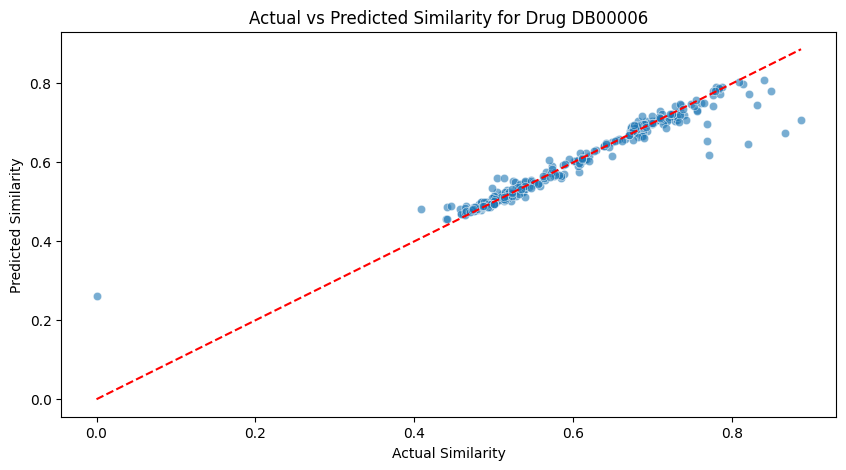

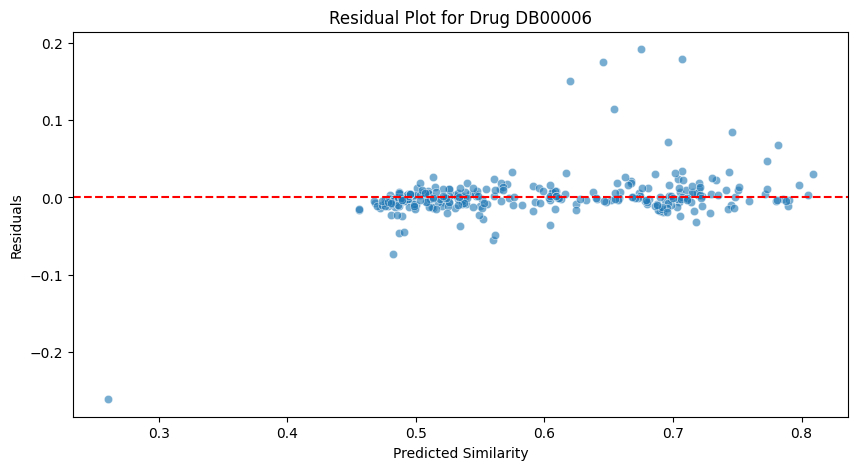

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

class SubsetMLDrugRecommender:
    def __init__(self, similarity_matrix=None, similarity_matrix_path=None, subset_size=1000):
        """
        Initialize the ML-based drug recommendation system with a similarity matrix.
        Can work with a subset of drugs to handle large datasets.

        Parameters:
        -----------
        similarity_matrix : pandas.DataFrame, optional
            A dataframe containing the Tanimoto similarity matrix
        similarity_matrix_path : str, optional
            Path to the similarity matrix CSV file
        subset_size : int, default=1000
            Maximum number of drugs to include in the subset
        """
        # Load the similarity matrix if provided
        if similarity_matrix is not None:
            self.full_similarity_df = similarity_matrix
        elif similarity_matrix_path is not None:
            self.full_similarity_df = pd.read_csv(similarity_matrix_path, index_col=0)
        else:
            raise ValueError("Either similarity_matrix or similarity_matrix_path must be provided")

        # Store the full list of drug IDs
        self.all_drug_ids = list(self.full_similarity_df.index)
        self.subset_size = min(subset_size, len(self.all_drug_ids))

        # Initialize as empty
        self.active_drug_ids = []
        self.similarity_df = None
        self.models = {}

        # Initialize the embedding models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None

    def create_random_subset(self, seed=42):
        """
        Create a random subset of drugs to work with.

        Parameters:
        -----------
        seed : int, default=42
            Random seed for reproducibility

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        np.random.seed(seed)
        self.active_drug_ids = np.random.choice(
            self.all_drug_ids,
            size=self.subset_size,
            replace=False
        ).tolist()

        return self.set_active_drugs(self.active_drug_ids)

    def set_active_drugs(self, drug_ids):
        """
        Set the active subset of drugs to work with.

        Parameters:
        -----------
        drug_ids : list
            List of drug IDs to include in the active set

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate that all drugs exist in the full matrix
        missing_drugs = [drug for drug in drug_ids if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following drugs were not found in the dataset: {missing_drugs}")

        # Set the active drug IDs
        self.active_drug_ids = drug_ids

        # Create the subset similarity matrix
        self.similarity_df = self.full_similarity_df.loc[self.active_drug_ids, self.active_drug_ids]

        # Reset the models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None
        self.models = {}

        print(f"Working with a subset of {len(self.active_drug_ids)} drugs")
        return self.similarity_df

    def create_subset_from_seeds(self, seed_drugs, neighbors_per_seed=50):
        """
        Create a subset centered around specific seed drugs.

        Parameters:
        -----------
        seed_drugs : list
            List of drug IDs to use as seeds
        neighbors_per_seed : int, default=50
            Number of similar drugs to include for each seed

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate seed drugs
        missing_drugs = [drug for drug in seed_drugs if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following seed drugs were not found: {missing_drugs}")

        # Start with the seed drugs
        subset = set(seed_drugs)

        # For each seed drug, find its most similar drugs
        for drug in seed_drugs:
            # Get similarity scores for this drug
            similarities = self.full_similarity_df[drug].sort_values(ascending=False)

            # Add the top neighbors (excluding the drug itself and already added drugs)
            neighbors = [
                neighbor for neighbor in similarities.index
                if neighbor != drug and neighbor not in subset
            ][:neighbors_per_seed]

            subset.update(neighbors)

        # Convert to list and set as active
        self.active_drug_ids = list(subset)

        # Limit to subset_size if needed
        if len(self.active_drug_ids) > self.subset_size:
            self.active_drug_ids = self.active_drug_ids[:self.subset_size]

        return self.set_active_drugs(self.active_drug_ids)

    def create_embeddings(self, n_components=None):
        """
        Create lower-dimensional embeddings of the drugs based on similarity matrix.

        Parameters:
        -----------
        n_components : int, optional
            Number of components for PCA. If None, uses min(n_samples, n_features) // 2

        Returns:
        --------
        pandas.DataFrame
            DataFrame with the embeddings
        """
        if self.similarity_df is None:
            raise ValueError("No active drug subset. Call create_random_subset or set_active_drugs first.")

        # Set a default number of components based on dataset size
        if n_components is None:
            n_components = min(len(self.active_drug_ids) // 2, 50)

        # Apply PCA to reduce dimensions
        self.pca_model = PCA(n_components=n_components)
        self.pca_embeddings = self.pca_model.fit_transform(self.similarity_df)

        # Create a dataframe with the embeddings
        self.embedding_df = pd.DataFrame(
            self.pca_embeddings,
            index=self.active_drug_ids,
            columns=[f'PC{i+1}' for i in range(n_components)]
        )

        print(f"Created {n_components}-dimensional embeddings using PCA")
        print(f"Explained variance ratio: {sum(self.pca_model.explained_variance_ratio_):.4f}")

        return self.embedding_df

    def create_tsne_visualization(self, perplexity=30, n_iter=1000):
        """
        Create a t-SNE visualization of the drug embeddings.

        Parameters:
        -----------
        perplexity : int, default=30
            Perplexity parameter for t-SNE
        n_iter : int, default=1000
            Number of iterations for t-SNE

        Returns:
        --------
        pandas.DataFrame
            DataFrame with t-SNE coordinates
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Apply t-SNE to visualize the embeddings in 2D
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
        self.tsne_embeddings = tsne.fit_transform(self.pca_embeddings)

        # Create a dataframe with the t-SNE coordinates
        self.tsne_df = pd.DataFrame(
            self.tsne_embeddings,
            index=self.active_drug_ids,
            columns=['x', 'y']
        )

        return self.tsne_df

    def cluster_drugs(self, n_clusters=None):
        """
        Cluster drugs based on their embeddings.

        Parameters:
        -----------
        n_clusters : int, optional
            Number of clusters. If None, uses sqrt(n) rule of thumb.

        Returns:
        --------
        pandas.Series
            Series mapping drug IDs to cluster labels
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Set a default number of clusters based on dataset size
        if n_clusters is None:
            n_clusters = max(2, int(np.sqrt(len(self.active_drug_ids))))

        # Apply KMeans clustering
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
        self.cluster_labels = self.kmeans_model.fit_predict(self.pca_embeddings)

        # Create a series mapping drug IDs to cluster labels
        self.clusters = pd.Series(self.cluster_labels, index=self.active_drug_ids)

        return self.clusters

    def train_similarity_predictor(self, test_size=0.2, random_state=42, drugs_to_train=None):
        """
        Train a machine learning model to predict similarity between drugs.

        Parameters:
        -----------
        test_size : float, default=0.2
            Proportion of the data to use for testing
        random_state : int, default=42
            Random seed for reproducibility
        drugs_to_train : list, optional
            Specific drugs to train models for. If None, trains for all active drugs.

        Returns:
        --------
        dict
            Dictionary containing training metrics
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # If no specific drugs are provided, use all active drugs
        if drugs_to_train is None:
            drugs_to_train = self.active_drug_ids
        else:
            # Validate that all drugs are in the active set
            missing_drugs = [drug for drug in drugs_to_train if drug not in self.active_drug_ids]
            if missing_drugs:
                raise ValueError(f"The following drugs are not in the active set: {missing_drugs}")

        print(f"Training similarity prediction models for {len(drugs_to_train)} drugs...")

        # For each drug, we'll train a model to predict its similarity to other drugs
        for i, drug_id in enumerate(drugs_to_train):
            if i % 10 == 0 and i > 0:
                print(f"Trained {i} models...")

            # Get the similarity scores for this drug
            y = self.similarity_df[drug_id].values

            # Use the embeddings as features
            X = self.pca_embeddings

            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )

            # Train a RandomForest model
            model = RandomForestRegressor(n_estimators=100, random_state=random_state)
            model.fit(X_train, y_train)

            # Evaluate the model
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Store the model
            self.models[drug_id] = {
                'model': model,
                'mse': mse
            }

        # Calculate average MSE
        avg_mse = np.mean([self.models[drug_id]['mse'] for drug_id in drugs_to_train])
        print(f"Average MSE across all trained drug models: {avg_mse:.6f}")

        return {'avg_mse': avg_mse}

    def evaluate_model_accuracy(self, drugs_to_evaluate=None):
        """
        Evaluate the accuracy of the trained similarity prediction models.

        Parameters:
        -----------
        drugs_to_evaluate : list, optional
            Specific drugs to evaluate. If None, evaluates all trained models.

        Returns:
        --------
        dict
            Dictionary containing evaluation metrics (MSE, MAE, R²) for each drug
        """
        if not self.models:
            raise ValueError("No models have been trained. Call train_similarity_predictor first.")

        # If no specific drugs are provided, evaluate all trained models
        if drugs_to_evaluate is None:
            drugs_to_evaluate = list(self.models.keys())
        else:
            # Validate that all drugs have been trained
            missing_drugs = [drug for drug in drugs_to_evaluate if drug not in self.models]
            if missing_drugs:
                raise ValueError(f"The following drugs have no trained models: {missing_drugs}")

        evaluation_results = {}

        for drug_id in drugs_to_evaluate:
            # Get the model and its data
            model = self.models[drug_id]['model']
            y = self.similarity_df[drug_id].values
            X = self.pca_embeddings

            # Predict similarity scores
            y_pred = model.predict(X)

            # Calculate metrics
            mse = mean_squared_error(y, y_pred)
            mae = mean_absolute_error(y, y_pred)
            r2 = r2_score(y, y_pred)

            # Store results
            evaluation_results[drug_id] = {
                'mse': mse,
                'mae': mae,
                'r2': r2
            }

        # Calculate average metrics
        avg_mse = np.mean([results['mse'] for results in evaluation_results.values()])
        avg_mae = np.mean([results['mae'] for results in evaluation_results.values()])
        avg_r2 = np.mean([results['r2'] for results in evaluation_results.values()])

        print(f"Average MSE across evaluated models: {avg_mse:.6f}")
        print(f"Average MAE across evaluated models: {avg_mae:.6f}")
        print(f"Average R² across evaluated models: {avg_r2:.6f}")

        return evaluation_results

    def visualize_model_performance(self, drug_id):
        """
        Visualize the performance of the model for a specific drug.

        Parameters:
        -----------
        drug_id : str
            The ID of the drug to visualize
        """
        if drug_id not in self.models:
            raise ValueError(f"No model trained for drug {drug_id}.")

        # Get the model and its data
        model = self.models[drug_id]['model']
        y = self.similarity_df[drug_id].values
        X = self.pca_embeddings

        # Predict similarity scores
        y_pred = model.predict(X)

        # Create a DataFrame for visualization
        results_df = pd.DataFrame({
            'Actual Similarity': y,
            'Predicted Similarity': y_pred
        })

        # Scatter plot of actual vs predicted
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=results_df, x='Actual Similarity', y='Predicted Similarity', alpha=0.6)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line
        plt.title(f"Actual vs Predicted Similarity for Drug {drug_id}")
        plt.xlabel("Actual Similarity")
        plt.ylabel("Predicted Similarity")
        plt.show()

        # Residual plot
        residuals = y - y_pred
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
        plt.title(f"Residual Plot for Drug {drug_id}")
        plt.xlabel("Predicted Similarity")
        plt.ylabel("Residuals")
        plt.show()

# Example usage
if __name__ == "__main__":
    # Load your similarity matrix (this is a placeholder)
    similarity_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv", index_col=0)

    # Create the ML recommender with a max subset size
    recommender = SubsetMLDrugRecommender(similarity_matrix=similarity_df, subset_size=1000)

    # Create a subset based on specific drugs of interest
    seed_drugs = ["DB00006", "DB00007", "DB00014"]
    recommender.create_subset_from_seeds(seed_drugs, neighbors_per_seed=100)

    # Create embeddings and cluster drugs
    recommender.create_embeddings()
    recommender.cluster_drugs()

    # Train ML models for specific drugs of interest
    recommender.train_similarity_predictor(drugs_to_train=seed_drugs)

    # Evaluate model accuracy
    evaluation_results = recommender.evaluate_model_accuracy(drugs_to_evaluate=seed_drugs)
    print("Evaluation Results:")
    for drug_id, metrics in evaluation_results.items():
        print(f"{drug_id}: MSE={metrics['mse']:.4f}, MAE={metrics['mae']:.4f}, R²={metrics['r2']:.4f}")

    # Visualize performance for a specific drug
    drug_id = "DB00006"
    recommender.visualize_model_performance(drug_id)


Visualizing performance for DB00006:


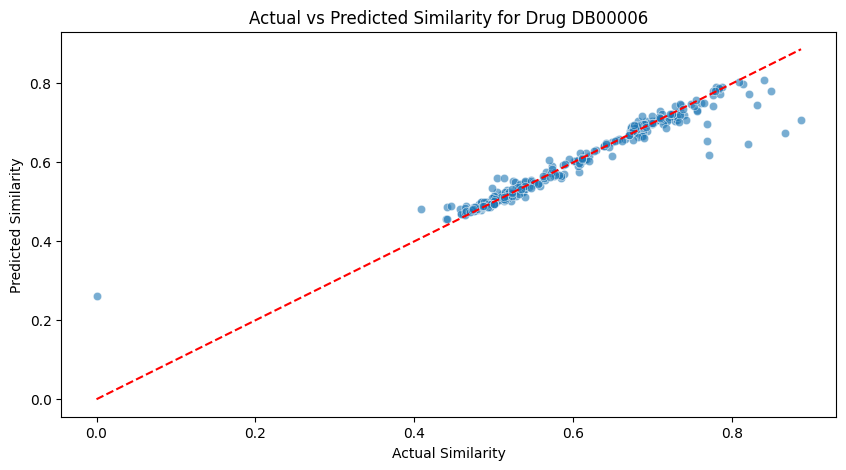

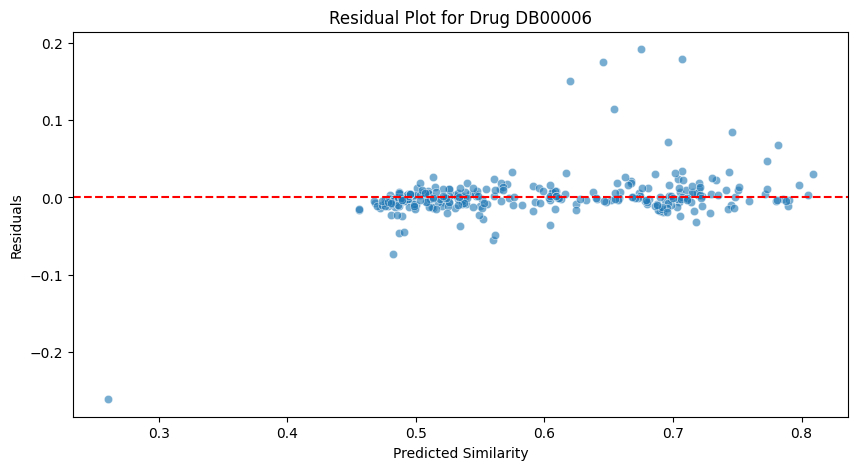


Visualizing performance for DB00007:


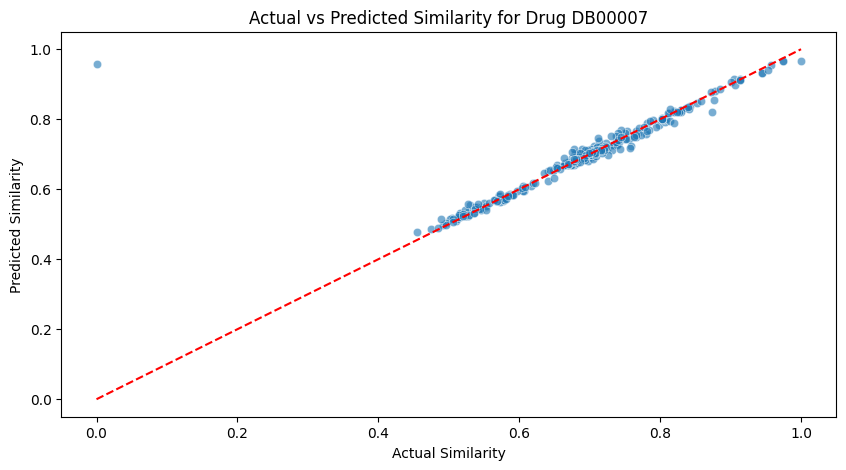

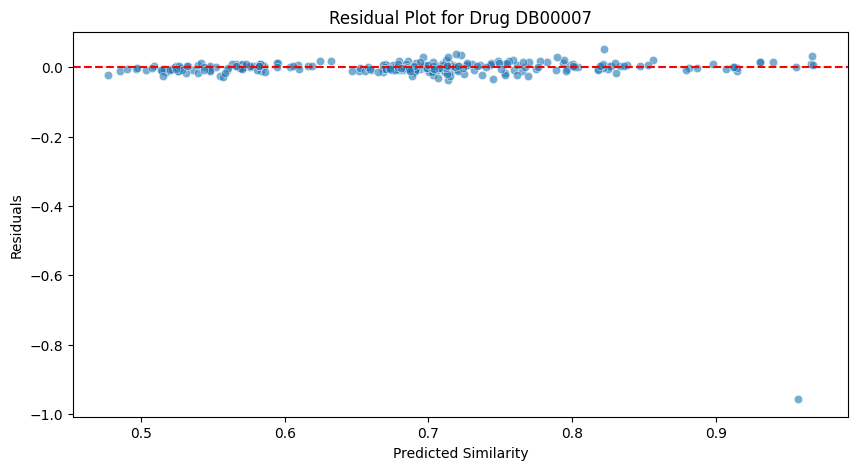


Visualizing performance for DB00014:


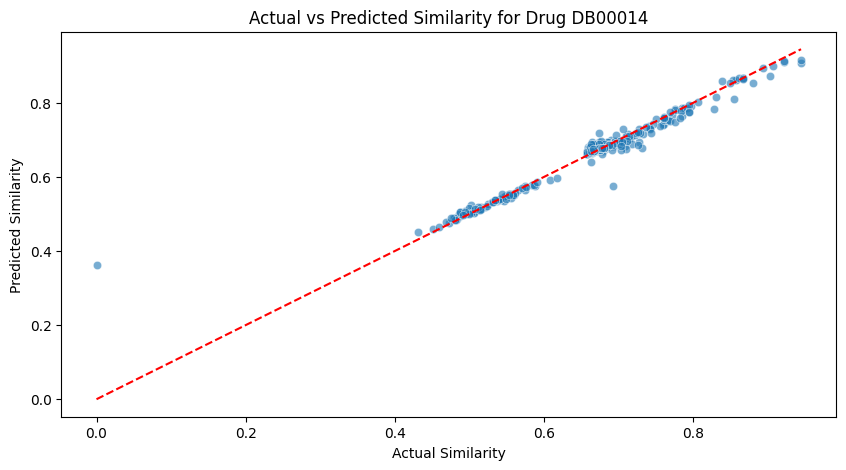

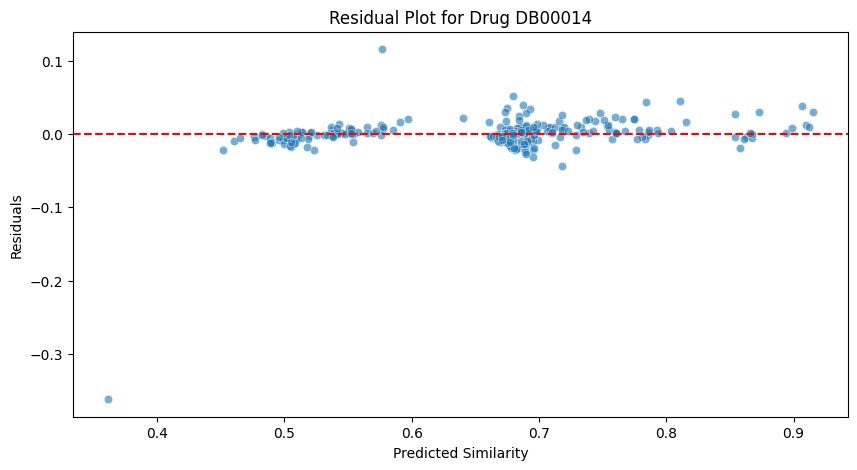

In [ ]:
# Visualize performance for each drug
for drug_id in ["DB00006", "DB00007", "DB00014"]:
    print(f"\nVisualizing performance for {drug_id}:")
    recommender.visualize_model_performance(drug_id)

In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9e2f87f04fc06c7d6b2881b07575a48f411b29f2192d2acf6afe5814ff9f108a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


SHAP summary for drug DB00006:


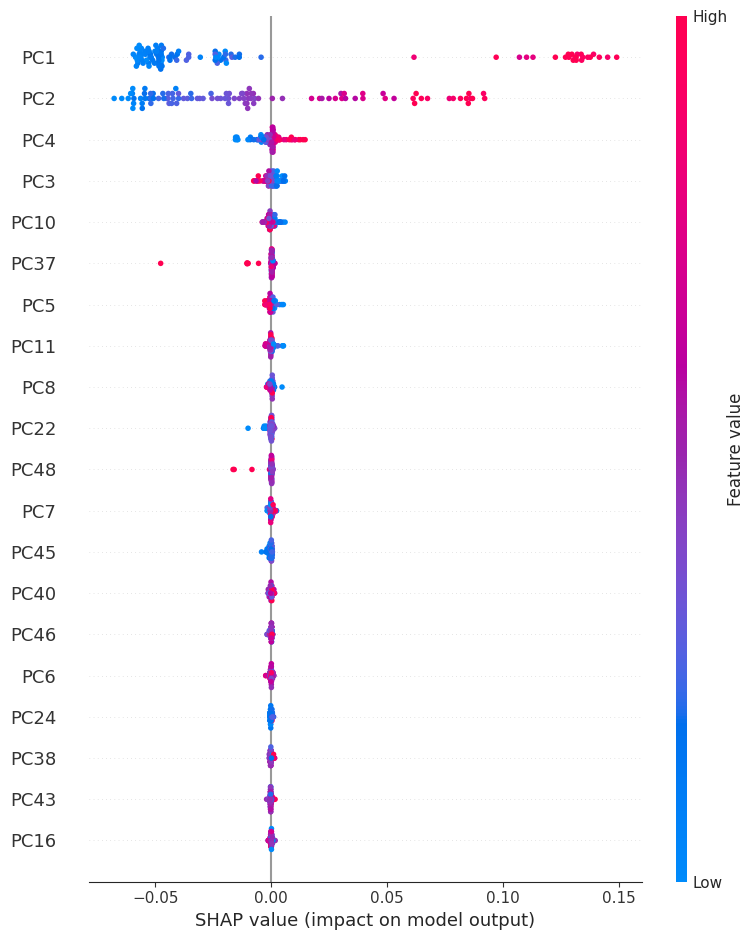

LIME explanation for drug DB00006 (instance 0):


<Figure size 640x480 with 0 Axes>

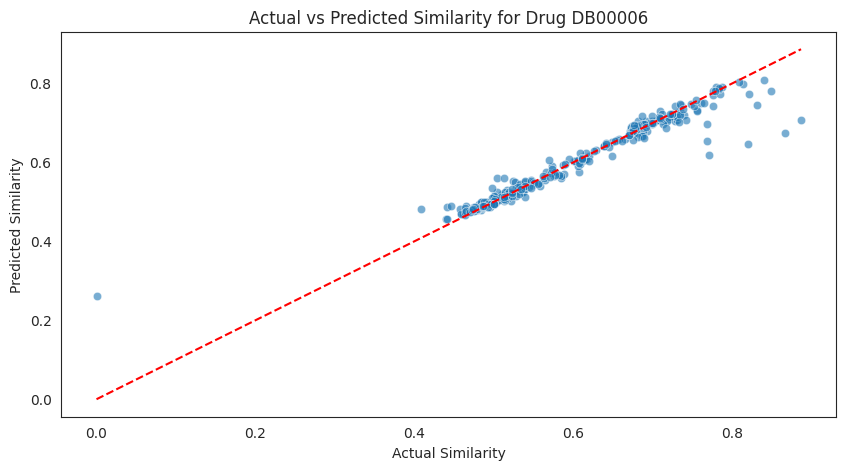

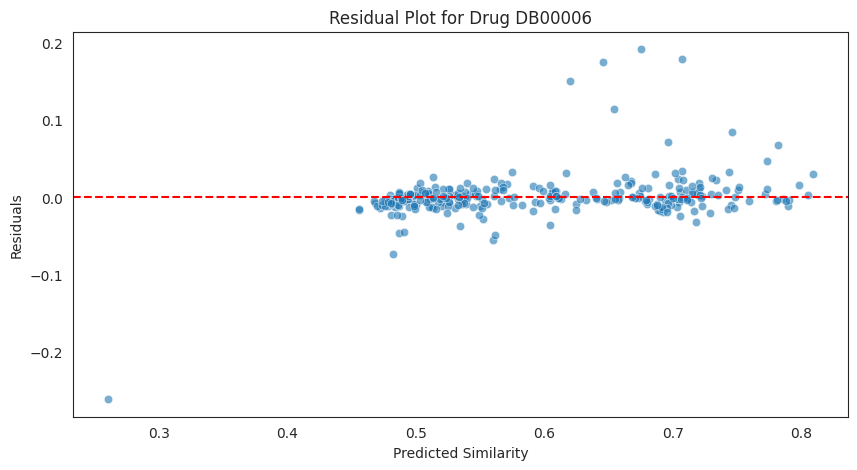

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular
import seaborn as sns

# Set white background for all plots
plt.style.use('default')  # Reset to default style
sns.set_style("white")  # Set seaborn style to white background

class SubsetMLDrugRecommender:
    def __init__(self, similarity_matrix=None, similarity_matrix_path=None, subset_size=1000):
        """
        Initialize the ML-based drug recommendation system with a similarity matrix.
        Can work with a subset of drugs to handle large datasets.

        Parameters:
        -----------
        similarity_matrix : pandas.DataFrame, optional
            A dataframe containing the Tanimoto similarity matrix
        similarity_matrix_path : str, optional
            Path to the similarity matrix CSV file
        subset_size : int, default=1000
            Maximum number of drugs to include in the subset
        """
        # Load the similarity matrix if provided
        if similarity_matrix is not None:
            self.full_similarity_df = similarity_matrix
        elif similarity_matrix_path is not None:
            self.full_similarity_df = pd.read_csv(similarity_matrix_path, index_col=0)
        else:
            raise ValueError("Either similarity_matrix or similarity_matrix_path must be provided")

        # Store the full list of drug IDs
        self.all_drug_ids = list(self.full_similarity_df.index)
        self.subset_size = min(subset_size, len(self.all_drug_ids))

        # Initialize as empty
        self.active_drug_ids = []
        self.similarity_df = None
        self.models = {}

        # Initialize the embedding models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None

    def create_random_subset(self, seed=42):
        """
        Create a random subset of drugs to work with.

        Parameters:
        -----------
        seed : int, default=42
            Random seed for reproducibility

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        np.random.seed(seed)
        self.active_drug_ids = np.random.choice(
            self.all_drug_ids,
            size=self.subset_size,
            replace=False
        ).tolist()

        return self.set_active_drugs(self.active_drug_ids)

    def set_active_drugs(self, drug_ids):
        """
        Set the active subset of drugs to work with.

        Parameters:
        -----------
        drug_ids : list
            List of drug IDs to include in the active set

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate that all drugs exist in the full matrix
        missing_drugs = [drug for drug in drug_ids if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following drugs were not found in the dataset: {missing_drugs}")

        # Set the active drug IDs
        self.active_drug_ids = drug_ids

        # Create the subset similarity matrix
        self.similarity_df = self.full_similarity_df.loc[self.active_drug_ids, self.active_drug_ids]

        # Reset the models
        self.pca_model = None
        self.pca_embeddings = None
        self.tsne_embeddings = None
        self.kmeans_model = None
        self.cluster_labels = None
        self.nn_model = None
        self.models = {}

        print(f"Working with a subset of {len(self.active_drug_ids)} drugs")
        return self.similarity_df

    def create_subset_from_seeds(self, seed_drugs, neighbors_per_seed=50):
        """
        Create a subset centered around specific seed drugs.

        Parameters:
        -----------
        seed_drugs : list
            List of drug IDs to use as seeds
        neighbors_per_seed : int, default=50
            Number of similar drugs to include for each seed

        Returns:
        --------
        pandas.DataFrame
            The similarity matrix for the subset of drugs
        """
        # Validate seed drugs
        missing_drugs = [drug for drug in seed_drugs if drug not in self.all_drug_ids]
        if missing_drugs:
            raise ValueError(f"The following seed drugs were not found: {missing_drugs}")

        # Start with the seed drugs
        subset = set(seed_drugs)

        # For each seed drug, find its most similar drugs
        for drug in seed_drugs:
            # Get similarity scores for this drug
            similarities = self.full_similarity_df[drug].sort_values(ascending=False)

            # Add the top neighbors (excluding the drug itself and already added drugs)
            neighbors = [
                neighbor for neighbor in similarities.index
                if neighbor != drug and neighbor not in subset
            ][:neighbors_per_seed]

            subset.update(neighbors)

        # Convert to list and set as active
        self.active_drug_ids = list(subset)

        # Limit to subset_size if needed
        if len(self.active_drug_ids) > self.subset_size:
            self.active_drug_ids = self.active_drug_ids[:self.subset_size]

        return self.set_active_drugs(self.active_drug_ids)

    def create_embeddings(self, n_components=None):
        """
        Create lower-dimensional embeddings of the drugs based on similarity matrix.

        Parameters:
        -----------
        n_components : int, optional
            Number of components for PCA. If None, uses min(n_samples, n_features) // 2

        Returns:
        --------
        pandas.DataFrame
            DataFrame with the embeddings
        """
        if self.similarity_df is None:
            raise ValueError("No active drug subset. Call create_random_subset or set_active_drugs first.")

        # Set a default number of components based on dataset size
        if n_components is None:
            n_components = min(len(self.active_drug_ids) // 2, 50)

        # Apply PCA to reduce dimensions
        self.pca_model = PCA(n_components=n_components)
        self.pca_embeddings = self.pca_model.fit_transform(self.similarity_df)

        # Create a dataframe with the embeddings
        self.embedding_df = pd.DataFrame(
            self.pca_embeddings,
            index=self.active_drug_ids,
            columns=[f'PC{i+1}' for i in range(n_components)]
        )

        print(f"Created {n_components}-dimensional embeddings using PCA")
        print(f"Explained variance ratio: {sum(self.pca_model.explained_variance_ratio_):.4f}")

        return self.embedding_df

    def create_tsne_visualization(self, perplexity=30, n_iter=1000):
        """
        Create a t-SNE visualization of the drug embeddings.

        Parameters:
        -----------
        perplexity : int, default=30
            Perplexity parameter for t-SNE
        n_iter : int, default=1000
            Number of iterations for t-SNE

        Returns:
        --------
        pandas.DataFrame
            DataFrame with t-SNE coordinates
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Apply t-SNE to visualize the embeddings in 2D
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
        self.tsne_embeddings = tsne.fit_transform(self.pca_embeddings)

        # Create a dataframe with the t-SNE coordinates
        self.tsne_df = pd.DataFrame(
            self.tsne_embeddings,
            index=self.active_drug_ids,
            columns=['x', 'y']
        )

        return self.tsne_df

    def cluster_drugs(self, n_clusters=None):
        """
        Cluster drugs based on their embeddings.

        Parameters:
        -----------
        n_clusters : int, optional
            Number of clusters. If None, uses sqrt(n) rule of thumb.

        Returns:
        --------
        pandas.Series
            Series mapping drug IDs to cluster labels
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # Set a default number of clusters based on dataset size
        if n_clusters is None:
            n_clusters = max(2, int(np.sqrt(len(self.active_drug_ids))))

        # Apply KMeans clustering
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
        self.cluster_labels = self.kmeans_model.fit_predict(self.pca_embeddings)

        # Create a series mapping drug IDs to cluster labels
        self.clusters = pd.Series(self.cluster_labels, index=self.active_drug_ids)

        return self.clusters

    def train_similarity_predictor(self, test_size=0.2, random_state=42, drugs_to_train=None):
        """
        Train a machine learning model to predict similarity between drugs.

        Parameters:
        -----------
        test_size : float, default=0.2
            Proportion of the data to use for testing
        random_state : int, default=42
            Random seed for reproducibility
        drugs_to_train : list, optional
            Specific drugs to train models for. If None, trains for all active drugs.

        Returns:
        --------
        dict
            Dictionary containing training metrics
        """
        if self.pca_embeddings is None:
            self.create_embeddings()

        # If no specific drugs are provided, use all active drugs
        if drugs_to_train is None:
            drugs_to_train = self.active_drug_ids
        else:
            # Validate that all drugs are in the active set
            missing_drugs = [drug for drug in drugs_to_train if drug not in self.active_drug_ids]
            if missing_drugs:
                raise ValueError(f"The following drugs are not in the active set: {missing_drugs}")

        print(f"Training similarity prediction models for {len(drugs_to_train)} drugs...")

        # For each drug, we'll train a model to predict its similarity to other drugs
        for i, drug_id in enumerate(drugs_to_train):
            if i % 10 == 0 and i > 0:
                print(f"Trained {i} models...")

            # Get the similarity scores for this drug
            y = self.similarity_df[drug_id].values

            # Use the embeddings as features
            X = self.pca_embeddings

            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )

            # Train a RandomForest model
            model = RandomForestRegressor(n_estimators=100, random_state=random_state)
            model.fit(X_train, y_train)

            # Evaluate the model
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Store the model
            self.models[drug_id] = {
                'model': model,
                'mse': mse
            }

        # Calculate average MSE
        avg_mse = np.mean([self.models[drug_id]['mse'] for drug_id in drugs_to_train])
        print(f"Average MSE across all trained drug models: {avg_mse:.6f}")

        return {'avg_mse': avg_mse}

    def explain_with_shap(self, drug_id, sample_size=100):
        """
        Explain the model's predictions using SHAP.

        Parameters:
        -----------
        drug_id : str
            The ID of the drug to explain predictions for.
        sample_size : int, default=100
            Number of samples to use for SHAP explanation (for faster computation).

        Returns:
        --------
        shap.Explanation
            SHAP explanation object
        """
        if drug_id not in self.models:
            raise ValueError(f"No model trained for drug {drug_id}.")

        # Get the model and its data
        model = self.models[drug_id]['model']
        X = self.pca_embeddings

        # Sample the data for faster computation
        if sample_size < len(X):
            X_sample = X[:sample_size]
        else:
            X_sample = X

        # Create a SHAP explainer
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_sample)

        # Visualize the SHAP summary plot with white background
        print(f"SHAP summary for drug {drug_id}:")
        plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
        shap.summary_plot(shap_values, X_sample, feature_names=self.embedding_df.columns, show=False)
        plt.gcf().set_facecolor('white')  # Ensure the figure background is white
        plt.show()

        return shap_values

    def explain_with_lime(self, drug_id, num_features=10):
        """
        Explain the model's predictions using LIME.

        Parameters:
        -----------
        drug_id : str
            The ID of the drug to explain predictions for.
        num_features : int, default=10
            Number of features to include in the explanation.

        Returns:
        --------
        lime.explanation.Explanation
            LIME explanation object
        """
        if drug_id not in self.models:
            raise ValueError(f"No model trained for drug {drug_id}.")

        # Get the model and its data
        model = self.models[drug_id]['model']
        X = self.pca_embeddings

        # Create a LIME explainer
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X,
            feature_names=self.embedding_df.columns,
            mode='regression'
        )

        # Explain a specific instance (e.g., the first drug in the dataset)
        instance_idx = 0  # You can change this to any index
        exp = explainer.explain_instance(
            X[instance_idx],
            model.predict,
            num_features=num_features
        )

        # Show the explanation with white background
        print(f"LIME explanation for drug {drug_id} (instance {instance_idx}):")
        plt.figure(facecolor='white')  # Set white background
        exp.show_in_notebook()  # For Jupyter Notebook
        # exp.as_pyplot_figure().set_facecolor('white')  # For non-notebook environments
        plt.gcf().set_facecolor('white')  # Ensure the figure background is white
        plt.show()

        return exp

    def visualize_model_performance(self, drug_id):
        """
        Visualize the performance of the model for a specific drug.

        Parameters:
        -----------
        drug_id : str
            The ID of the drug to visualize
        """
        if drug_id not in self.models:
            raise ValueError(f"No model trained for drug {drug_id}.")

        # Get the model and its data
        model = self.models[drug_id]['model']
        y = self.similarity_df[drug_id].values
        X = self.pca_embeddings

        # Predict similarity scores
        y_pred = model.predict(X)

        # Create a DataFrame for visualization
        results_df = pd.DataFrame({
            'Actual Similarity': y,
            'Predicted Similarity': y_pred
        })

        # Scatter plot of actual vs predicted with white background
        plt.figure(figsize=(10, 5), facecolor='white')  # Set white background
        sns.scatterplot(data=results_df, x='Actual Similarity', y='Predicted Similarity', alpha=0.6)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line
        plt.title(f"Actual vs Predicted Similarity for Drug {drug_id}")
        plt.xlabel("Actual Similarity")
        plt.ylabel("Predicted Similarity")
        plt.gcf().set_facecolor('white')  # Ensure the figure background is white
        plt.show()

        # Residual plot with white background
        residuals = y - y_pred
        plt.figure(figsize=(10, 5), facecolor='white')  # Set white background
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
        plt.title(f"Residual Plot for Drug {drug_id}")
        plt.xlabel("Predicted Similarity")
        plt.ylabel("Residuals")
        plt.gcf().set_facecolor('white')  # Ensure the figure background is white
        plt.show()

    def save_model(self, path):
        """
        Save the ML drug recommender to a file.

        Parameters:
        -----------
        path : str
            Path to save the model
        """
        with open(path, 'wb') as f:
            pickle.dump(self, f)

    @classmethod
    def load_model(cls, path):
        """
        Load a saved ML drug recommender.

        Parameters:
        -----------
        path : str
            Path to the saved model

        Returns:
        --------
        SubsetMLDrugRecommender
            The loaded model
        """
        with open(path, 'rb') as f:
            return pickle.load(f)

# Example usage
if __name__ == "__main__":
  with open("/content/MODELS/subset_ml_drug_recommender.pkl", "rb") as f:
    recommender = pickle.load(f)

# Explain predictions for a specific drug using SHAP
drug_id = "DB00006"
shap_values = recommender.explain_with_shap(drug_id)

# Explain predictions for a specific drug using LIME
lime_explanation = recommender.explain_with_lime(drug_id)

# Visualize model performance
recommender.visualize_model_performance(drug_id)